170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8029 - loss: 0.6261
Test Accuracy: 0.7983999848365784
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step
Predicted: [3 8 8 0]
Actual   : [3 8 8 0]


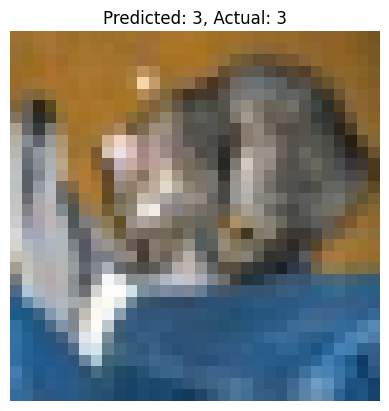

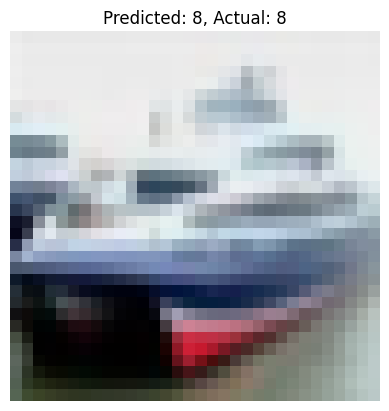

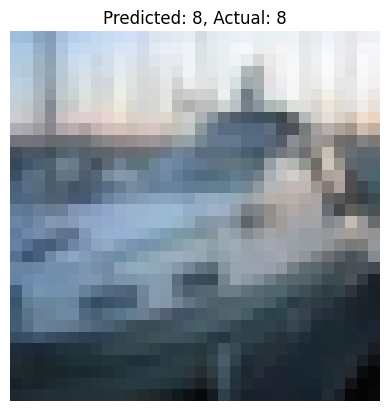

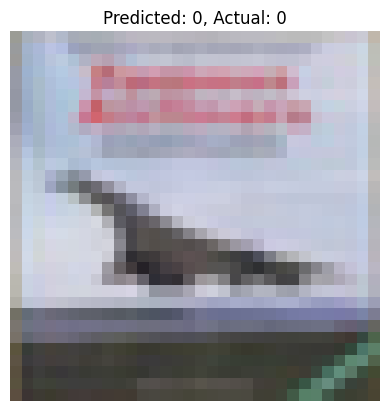

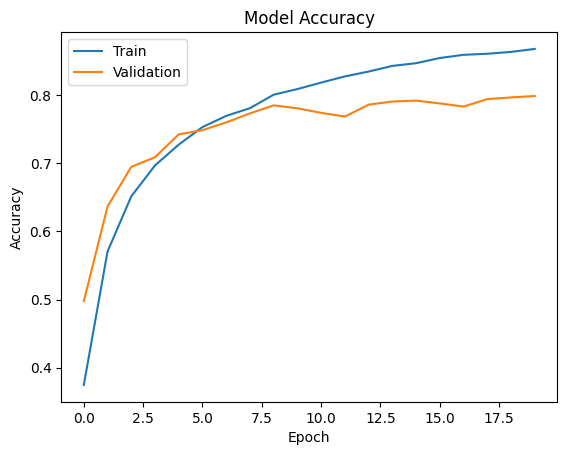

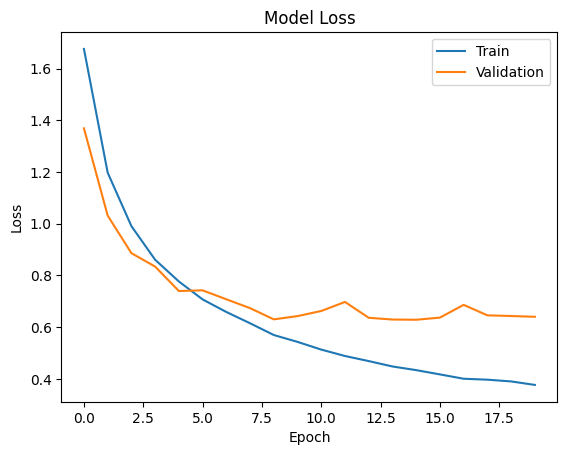

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------
# Load Dataset (CIFAR-10)
# -------------------------------------------------
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values (0-255 → 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# -------------------------------------------------
# Build CNN Model (Based on PDF Instructions)
# -------------------------------------------------
padding= 'same'
from tensorflow.keras.layers import Input

model = Sequential()

# Input Layer
model.add(Input(shape=(32,32,3)))

# 32 filters
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 64 filters
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 128 filters
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully Connected
model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))


# -------------------------------------------------
# Compile Model
# -------------------------------------------------
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# -------------------------------------------------
# Train Model
# -------------------------------------------------
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=64,
                    verbose=0,
                    validation_data=(x_test, y_test))

# -------------------------------------------------
# Evaluate Model
# -------------------------------------------------
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

# Predict first 4 images
predictions = model.predict(x_test[:4])

predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test[:4], axis=1)

print("Predicted:", predicted_classes)
print("Actual   :", actual_classes)

# Display images
for i in range(4):
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {predicted_classes[i]}, Actual: {actual_classes[i]}")
    plt.axis('off')
    plt.show()
# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()
